In [1]:
from Utility import gradient_first
from Solver_q import *
import numpy as np
import scipy.io
import scipy.ndimage
import matplotlib.pyplot as plt
from timeit import default_timer

ny = 256
L = 32
yy, dy = np.linspace(0, L - L/ny, ny), L/ny

H = [1.0, 1.0]               # the rest depths of each layer
lam = 0.25
U = [1.0, -1.0]
dU = U[0] - U[1] 
F1 = 2.0/lam**2
F2 = 2.0/lam**2
hyper_nu, hyper_order = 0.0, 2

In [2]:
mu = 0.32        # bottom drag
file_name, beta  = 'beta12rek0p32', 12
start, end, step = 3000000, 6000000, 20000

flow_means, _ = preprocess_data(file_name, beta, lam, dU, L, start, end, step)
mu_mean, dpv_mean, u_mean, vor_mean, q_mean, psi_mean, flux_mean = flow_means




In [5]:
from Solver_q import *

# mu_mean_clip[1, :] -= min(mu_mean_clip[1, :])

save_every = 1000
save_every = 1000
dt = 1e-3
Nt = 20000 #4000*10
Nt = 40000 #4000*10

q0 = np.copy(q_mean)
    
y_sol, t_sol, q_sol = solve_q(ny, L, F1, F2, beta, mu, dU, hyper_nu, hyper_order, q0,
            dt, Nt, save_every,
            "nnmodel")

1000 max q 13.080605966106413
2000 max q 12.39940376451475
3000 max q 11.819776225426217
4000 max q 11.396750532396426
5000 max q 11.016160255471307
6000 max q 10.670425968189384
7000 max q 10.387046506778834
8000 max q 10.144139133218053
9000 max q 9.914139876984365
10000 max q 9.69524557983254
11000 max q 9.486208023661675
12000 max q 9.286063798724024
13000 max q 9.09406514872209
14000 max q 8.916309506209592
15000 max q 8.767945249937698
16000 max q 8.622751102124967
17000 max q 8.480625715761478
18000 max q 8.341486395336286
19000 max q 8.205248000439717
20000 max q 8.071851964899565
21000 max q 7.941241711899939
22000 max q 7.813363739863773
23000 max q 7.688163265279633
24000 max q 7.5655829959022105
25000 max q 7.445564641066044
26000 max q 7.328051429472264
27000 max q 7.212988595125929
28000 max q 7.100321784249439
29000 max q 6.989997536972416
30000 max q 6.881957829836149
31000 max q 6.776149161925931
32000 max q 6.672519762395017
33000 max q 6.571018177763845
34000 max q 6

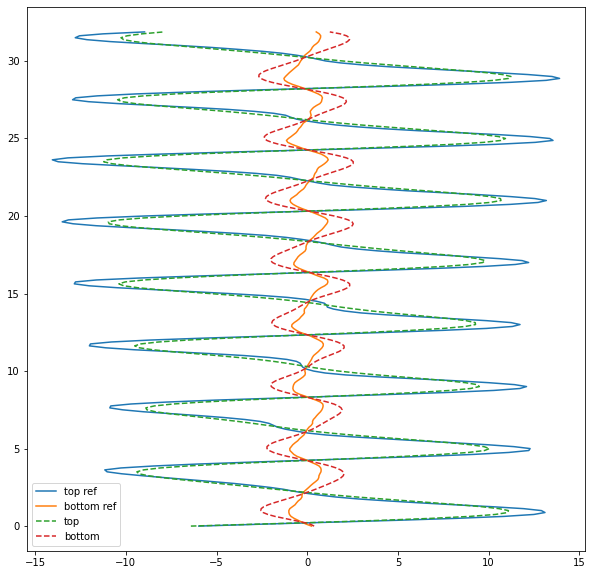

In [4]:
q_mean_ref = q_mean
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.plot(q_mean_ref[0, :], yy, label="top ref")
ax.plot(q_mean_ref[1, :], yy, label="bottom ref")

ax.plot(np.mean(q_sol[Nt//(2*save_every):, 0, :], axis=0), y_sol, "--", label="top")
ax.plot(np.mean(q_sol[Nt//(2*save_every):, 1, :], axis=0), y_sol, "--", label="bottom")

ax.legend()

In [3]:
from Solver_q import *

# mu_mean_clip[1, :] -= min(mu_mean_clip[1, :])

save_every = 1000
save_every = 1000
dt = 1e-3
Nt = 20000 #4000*10
Nt = 40000 #4000*10

q0 = np.zeros((2, ny))
q0[0, :] = 1e-1 * np.sin(2*np.pi*yy/L)
q0[1, :] = 1e-1 * np.cos(2*np.pi*yy/L)
    
y_sol, t_sol, q_sol = solve_q(ny, L, F1, F2, beta, mu, dU, hyper_nu, hyper_order, q0,
            dt, Nt, save_every,
            "nnmodel")


1000 max q 0.1000942871978675
2000 max q 0.10018867788322335
3000 max q 0.1002831004594696
4000 max q 0.10037766467087729
5000 max q 0.10047232196956582
6000 max q 0.10056706134674669
7000 max q 0.10066184521531063
8000 max q 0.10075677455903605
9000 max q 0.1008517676086712
10000 max q 0.10094684977922339
11000 max q 0.10104203747029264
12000 max q 0.10113729352209244
13000 max q 0.101232655671211
14000 max q 0.10132810534733235
15000 max q 0.1014236519053562
16000 max q 0.10151927787698677


KeyboardInterrupt: 

In [ ]:
q_mean_ref = q_mean
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.plot(q_mean_ref[0, :], yy, label="top ref")
ax.plot(q_mean_ref[1, :], yy, label="bottom ref")

ax.plot(np.mean(q_sol[Nt//(2*save_every):, 0, :], axis=0), y_sol, "--", label="top")
ax.plot(np.mean(q_sol[Nt//(2*save_every):, 1, :], axis=0), y_sol, "--", label="bottom")

ax.legend()